Завдання: Створити власний набір даних для навчання та тренування моделі бінарної класифікації

1 Завантаження всіх бібліотек:

In [22]:
import os
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import optimizers
from sklearn.metrics import classification_report



2. Створення та обробка даних:

Found 100 images belonging to 1 classes.


Found 7 images belonging to 1 classes.
Found 100 images belonging to 1 classes.
Found 6 images belonging to 1 classes.


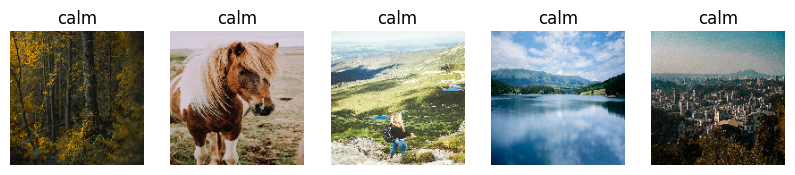

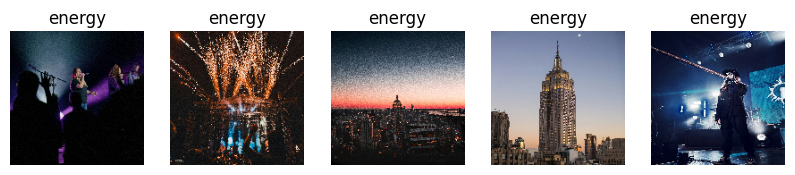

In [19]:

calm_train_dir = r"C:\Users\Єва\OneDrive\Робочий стіл\Data-science\lab9\data\train\calm_train_class"
calm_test_dir = r"C:\Users\Єва\OneDrive\Робочий стіл\Data-science\lab9\data\test\calm_test_class"
energy_train_dir = r"C:\Users\Єва\OneDrive\Робочий стіл\Data-science\lab9\data\train\energy_train_class"
energy_test_dir = r"C:\Users\Єва\OneDrive\Робочий стіл\Data-science\lab9\data\test\energy_test_class"

# Ініціалізація ImageDataGenerator для попередньої обробки даних
datagen = ImageDataGenerator(rescale=1./255)

# Завантаження даних для calm та energy
calm_train_data = datagen.flow_from_directory(
    calm_train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    shuffle=True
)

calm_test_data = datagen.flow_from_directory(
    calm_test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    shuffle=False
)

energy_train_data = datagen.flow_from_directory(
    energy_train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    shuffle=True
)

energy_test_data = datagen.flow_from_directory(
    energy_test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    shuffle=False
)

# Візуалізація зображень для calm
calm_images, calm_labels = next(calm_train_data)
plt.figure(figsize=(10, 5))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(calm_images[i])
    plt.axis('off')
    plt.title("calm")
plt.show()

# Візуалізація зображень для energy
energy_images, energy_labels = next(energy_train_data)
plt.figure(figsize=(10, 5))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(energy_images[i])
    plt.axis('off')
    plt.title("energy")
plt.show()



3. Створення архітектури CNN & тренування та тестування моделі

Завантаження даних з C:\Users\Єва\OneDrive\Робочий стіл\Data-science\lab9\data\train...
Found 200 images belonging to 2 classes.
Завантаження даних з C:\Users\Єва\OneDrive\Робочий стіл\Data-science\lab9\data\test...
Found 12 images belonging to 2 classes.
Found 200 images belonging to 2 classes (train).
Found 12 images belonging to 2 classes (test).


c:\Users\Єва\OneDrive\Робочий стіл\Data-science\.conda\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\Єва\OneDrive\Робочий стіл\Data-science\.conda\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 57s 9s/step - accuracy: 0.5330 - loss: 0.7980 - val_accuracy: 0.0833 - val_loss: 0.7631
Epoch 2/30
1/6 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.5938 - loss: 0.6436

c:\Users\Єва\OneDrive\Робочий стіл\Data-science\.conda\lib\contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 625ms/step - accuracy: 0.5938 - loss: 0.6436 - val_accuracy: 0.0000e+00 - val_loss: 0.9333
Epoch 3/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 48s 8s/step - accuracy: 0.5640 - loss: 0.6440 - val_accuracy: 1.0000 - val_loss: 0.5536
Epoch 4/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 10s 596ms/step - accuracy: 0.6250 - loss: 0.6787 - val_accuracy: 1.0000 - val_loss: 0.5603
Epoch 5/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 48s 8s/step - accuracy: 0.6480 - loss: 0.6227 - val_accuracy: 0.9167 - val_loss: 0.5507
Epoch 6/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 9s 603ms/step - accuracy: 0.6875 - loss: 0.5272 - val_accuracy: 0.8333 - val_loss: 0.5810
Epoch 7/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 51s 8s/step - accuracy: 0.7257 - loss: 0.5717 - val_accuracy: 0.5000 - val_loss: 0.6667
Epoch 8/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 8s 619ms/step - accuracy: 0.6875 - loss: 0.5014 - val_accuracy: 0.4167 - val_loss: 0.7868
Epoch 9/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 50s 8s/step - accuracy: 0.7156 - loss: 0.4993 - val_accuracy: 1.0000 - val_loss: 0.3705
Epoch 

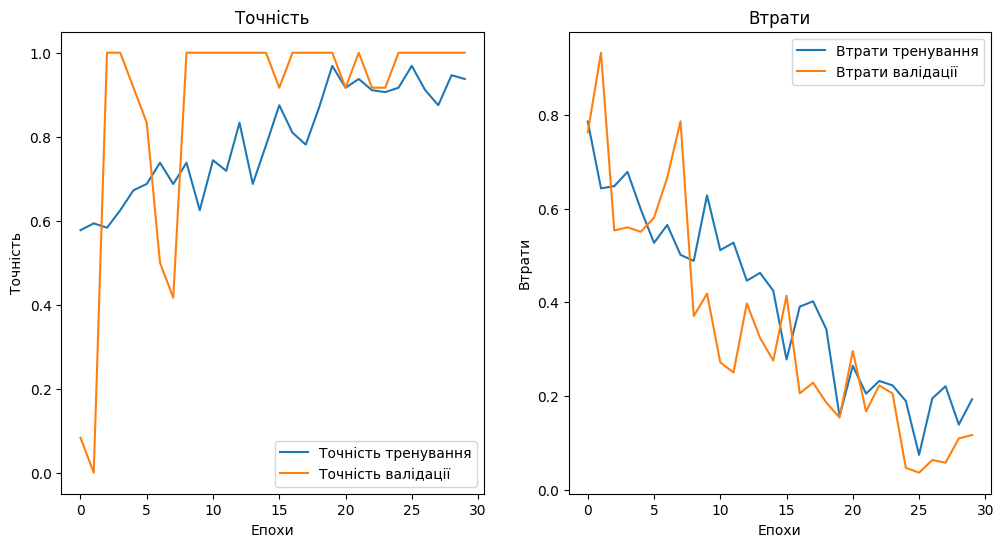

In [ ]:

# Функція для підготовки даних]
def load_data(data_dir, target_size=(150, 150), batch_size=32):
    """
    Завантаження даних з вказаної директорії.
    Піддиректорії всередині визначають класи.
    """
    datagen = ImageDataGenerator(rescale=1.0 / 255)
    
    print(f"Завантаження даних з {data_dir}...")
    data = datagen.flow_from_directory(
        data_dir,
        target_size=target_size,
        batch_size=batch_size,
        class_mode='binary'
    )
    
    return data

# Функція для побудови моделі CNN
def build_model(input_shape=(150, 150, 3)):
    """
    Побудова згорткової нейронної мережі для задачі класифікації.
    """
    model = Sequential()

    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D((2, 2)))

    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))

    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))

    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(
        loss='binary_crossentropy',
        optimizer=optimizers.Adam(),
        metrics=['accuracy']
    )
    
    return model

# Функція для візуалізації результатів
def plot_history(history):
    """
    Побудова графіків точності та втрат під час тренування моделі.
    """
    plt.figure(figsize=(12, 6))
    
    # Точність
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Точність тренування')
    plt.plot(history.history['val_accuracy'], label='Точність валідації')
    plt.xlabel('Епохи')
    plt.ylabel('Точність')
    plt.legend()
    plt.title('Точність')

    # Втрати
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Втрати тренування')
    plt.plot(history.history['val_loss'], label='Втрати валідації')
    plt.xlabel('Епохи')
    plt.ylabel('Втрати')
    plt.legend()
    plt.title('Втрати')
    
    plt.show()


train_dir = r"C:\Users\Єва\OneDrive\Робочий стіл\Data-science\lab9\data\train"
test_dir = r"C:\Users\Єва\OneDrive\Робочий стіл\Data-science\lab9\data\test"


train_data = load_data(train_dir)
test_data = load_data(test_dir)


print(f"Found {train_data.samples} images belonging to {train_data.num_classes} classes (train).")
print(f"Found {test_data.samples} images belonging to {test_data.num_classes} classes (test).")


model = build_model()

# Тренування моделі
history = model.fit(
    train_data,
    steps_per_epoch=train_data.samples // train_data.batch_size,
    epochs=30,  # Кількість епох
    validation_data=test_data,
    validation_steps=test_data.samples // test_data.batch_size
)

# Візуалізація результатів
plot_history(history)


4. Оцінка результатів:

In [ ]:
print(classification_report(
    y_true,
    y_pred,
    labels=[0, 1],
    target_names=["calm_test_class", "energy_test_class"],
    zero_division=1  
))


                   precision    recall  f1-score   support

  calm_test_class       1.00      1.00      1.00        12
energy_test_class       1.00      1.00      1.00         0

         accuracy                           1.00        12
        macro avg       1.00      1.00      1.00        12
     weighted avg       1.00      1.00      1.00        12

